In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

In [3]:
data.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
232,88203002,B,11.220,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
563,926125,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.317400,0.147400,...,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
414,905680,M,15.130,29.81,96.71,719.5,0.08320,0.04605,0.046860,0.027390,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.15470,0.06575,0.3233,0.06165
394,903554,B,12.100,17.72,78.07,446.2,0.10290,0.09758,0.047830,0.033260,...,13.56,25.80,88.33,559.5,0.14320,0.17730,0.16030,0.06266,0.3049,0.07081
102,862965,B,12.180,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.017700,...,13.34,32.84,84.58,547.8,0.11230,0.08862,0.11450,0.07431,0.2694,0.06878
498,914769,M,18.490,17.52,121.30,1068.0,0.10120,0.13170,0.149100,0.091830,...,22.75,22.88,146.40,1600.0,0.14120,0.30890,0.35330,0.16630,0.2510,0.09445
332,897132,B,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,...,11.98,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
82,8611555,M,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,...,30.00,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510
318,894329,B,9.042,18.90,60.07,244.5,0.09968,0.19720,0.197500,0.049080,...,10.06,23.40,68.62,297.1,0.12210,0.37480,0.46090,0.11450,0.3135,0.10550
79,8610908,B,12.860,18.00,83.19,506.3,0.09934,0.09546,0.038890,0.023150,...,14.24,24.82,91.88,622.1,0.12890,0.21410,0.17310,0.07926,0.2779,0.07918


In [4]:
data.shape

(569, 32)

In [5]:
data.drop(columns='id',inplace=True)

In [6]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
data.duplicated().sum() 

0

In [9]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
data['diagnosis'].value_counts() 

diagnosis
B    357
M    212
Name: count, dtype: int64

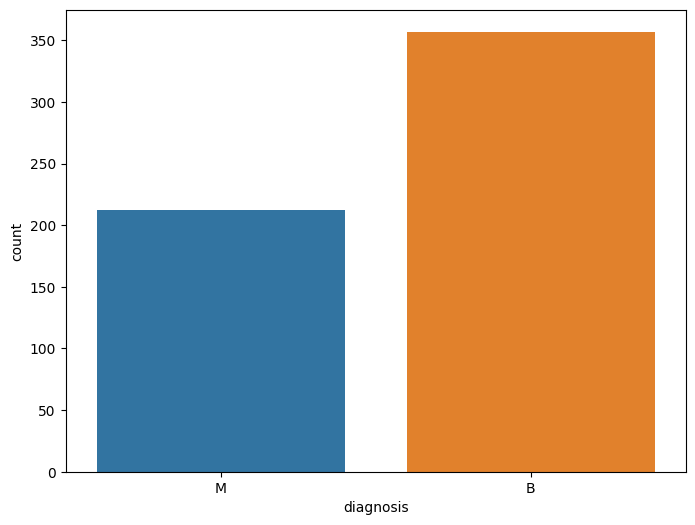

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(data = data ,x= data['diagnosis'])
plt.show()


In [12]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, 0].values

# encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

## Splitting 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree Classification

In [16]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
y_pred = DTC.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
a=accuracy_score(y_test, y_pred)
print(a)

[[84  6]
 [ 1 52]]
0.951048951048951


True Negative: 84
False Negative: 1
False pasitive: 6
True positive: 52


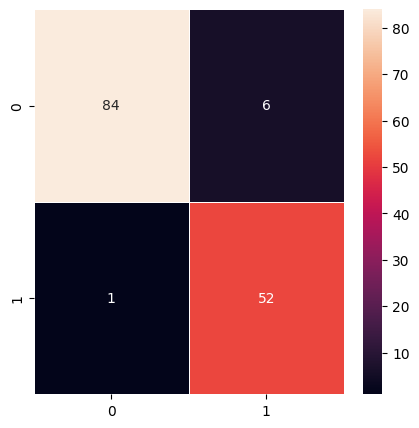

In [19]:
plt.figure(figsize=(5,5)) 
sns.heatmap(cm,annot=True , linewidth=0.5) 
print('True Negative:',cm[0,0])
print('False Negative:',cm[1,0])
print('False pasitive:',cm[0,1])
print('True positive:',cm[1,1])


# Random Forest Classification

In [20]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [21]:
y_pred1 = RFC.predict(X_test)


In [22]:
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
b=accuracy_score(y_test, y_pred1)
print(b)

[[88  2]
 [ 1 52]]
0.9790209790209791


True Negative: 88
False Negative: 1
False pasitive: 2
True positive: 52


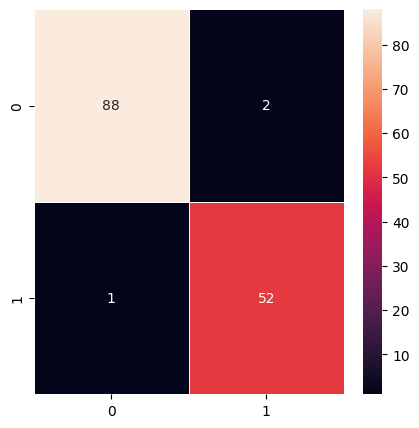

In [23]:
plt.figure(figsize=(5,5)) 
sns.heatmap(cm1,annot=True , linewidth=0.5) 
print('True Negative:',cm1[0,0])
print('False Negative:',cm1[1,0])
print('False pasitive:',cm1[0,1])
print('True positive:',cm1[1,1])


# K-Nearest Neighbors (K-NN)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred2 = KNN.predict(X_test)


In [26]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
c=accuracy_score(y_test, y_pred2)
print(c)

[[89  1]
 [ 5 48]]
0.958041958041958


True Negative: 89
False Negative: 5
False pasitive: 1
True positive: 48


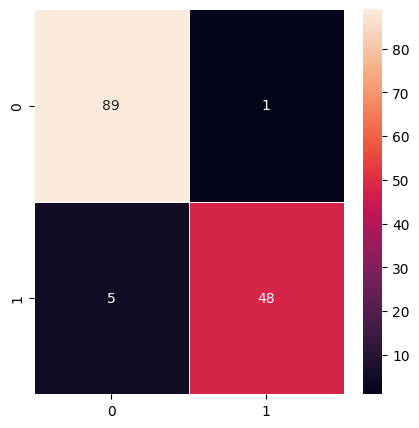

In [27]:
plt.figure(figsize=(5,5)) 
sns.heatmap(cm2,annot=True , linewidth=0.5) 
print('True Negative:',cm2[0,0])
print('False Negative:',cm2[1,0])
print('False pasitive:',cm2[0,1])
print('True positive:',cm2[1,1])


# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
y_pred3 = LR.predict(X_test)


In [30]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
d=accuracy_score(y_test, y_pred3)
print(d)

[[86  4]
 [ 4 49]]
0.9440559440559441


True Negative: 86
False Negative: 4
False pasitive: 4
True positive: 49


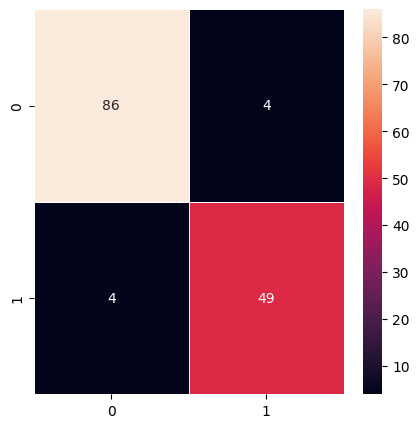

In [31]:
plt.figure(figsize=(5,5)) 
sns.heatmap(cm3,annot=True , linewidth=0.5) 
print('True Negative:',cm3[0,0])
print('False Negative:',cm3[1,0])
print('False pasitive:',cm3[0,1])
print('True positive:',cm3[1,1])


# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred4 = NB.predict(X_test)


In [34]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
e=accuracy_score(y_test, y_pred4)
print(e)

[[85  5]
 [ 6 47]]
0.9230769230769231


True Negative: 85
False Negative: 6
False pasitive: 5
True positive: 47


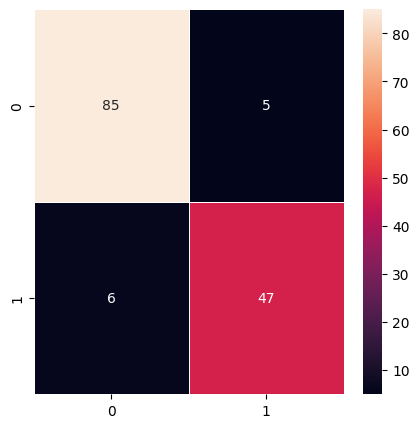

In [35]:
plt.figure(figsize=(5,5)) 
sns.heatmap(cm4,annot=True , linewidth=0.5) 
print('True Negative:',cm4[0,0])
print('False Negative:',cm4[1,0])
print('False pasitive:',cm4[0,1])
print('True positive:',cm4[1,1])


# SVC

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

In [37]:
y_pred5 = classifier.predict(X_test)


In [38]:
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)
f=accuracy_score(y_test, y_pred5)
print(f)

[[88  2]
 [ 3 50]]
0.965034965034965


True Negative: 88
False Negative: 3
False pasitive: 2
True positive: 50


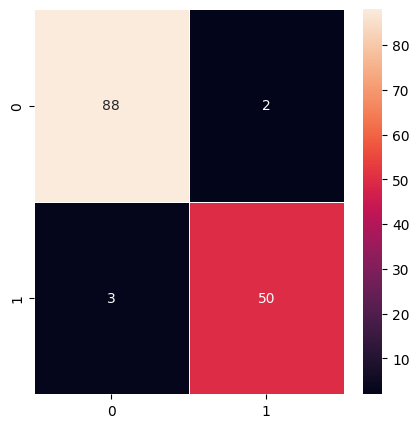

In [39]:
plt.figure(figsize=(5,5)) 
sns.heatmap(cm5,annot=True , linewidth=0.5) 
print('True Negative:',cm5[0,0])
print('False Negative:',cm5[1,0])
print('False pasitive:',cm5[0,1])
print('True positive:',cm5[1,1])


In [40]:
model=['Decision Tree Classification','Random Forest Classification','K-Nearest Neighbors','LogisticRegression','Naive Bayes','SVC']
accuracy=[a,b,c,d,e,f]
Final_result=pd.DataFrame({'Algorisms':model ,'Accuracies':accuracy})
Final_result

,Algorisms,Accuracies
0,Decision Tree Classification,0.951049
1,Random Forest Classification,0.979021
2,K-Nearest Neighbors,0.958042
3,LogisticRegression,0.944056
4,Naive Bayes,0.923077
5,SVC,0.965035
